In [671]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [672]:
data_path = "/Users/ameliabaum/Desktop/Amelia/Berkeley Fall 2019/CY PLAN 257/Final Project/data/"

In [673]:
# pums = pd.read_csv(data_path+"csv_hca/psam_h06.csv")
# list(pums.columns)

In [674]:
zcode_data = pd.read_csv(data_path+"bay_all.csv").rename({"Unnamed: 0": "ZIP"}, axis=1)


modes_zcodes = zcode_data[[col for col in zcode_data.columns if ("ZIP" in col)
                        or ("auto" in col) or ("walkbk" in col) or ("transit" in col)]]

# purposes_zcodes = zcode_data[[col for col in zcode_data.columns if ("ZIP" in col)
#                         or ("sch_work" in col) or ("discretionary" in col) or ("home" in col)]]

# modes_zcodes

In [675]:
zcode_data = modes_zcodes

,ZIP,i_transit_hr_0,i_auto_hr_0,i_walkbk_hr_0,i_transit_hr_1,i_auto_hr_1,i_walkbk_hr_1,i_transit_hr_2,i_auto_hr_2,i_walkbk_hr_2,...,i_walkbk_hr_20,i_transit_hr_21,i_auto_hr_21,i_walkbk_hr_21,i_transit_hr_22,i_auto_hr_22,i_walkbk_hr_22,i_transit_hr_23,i_auto_hr_23,i_walkbk_hr_23
0,94002,0,0,125,26,14,24,53,34,35,...,5,0,0,2,0,3,2,8,6,4
1,94005,0,0,24,6,9,4,7,4,3,...,0,0,0,1,0,0,2,1,0,0
2,94010,0,1,189,71,48,62,83,61,56,...,2,0,0,4,9,8,8,13,4,11
3,94014,2,0,71,33,34,29,38,42,21,...,1,0,0,0,7,5,7,4,4,6
4,94015,2,1,113,38,50,46,44,42,24,...,2,0,0,2,2,5,5,4,0,1


We can see that several the the features have high collinearity. I eliminated the all auto and all transit feature because it had very high collinearity with some other features including any of the features containing transit or auto.total inbound and total oubound have reletively high collinearity with other subsets of inbound/outbound. some of the high collinearities are not easily explained, such as the relationship between "total inbound" and "work auto outbound". Other relationships between inbound and outbound features suggest that inboundna outbound counts are positively correlated, which suggests that zip codes with a lot of inbound trips at one time of day have a lot of outbound trips as well. This makes sense, given that this is daily activity and we would expect most people who enter the zip code for work, school, or other activities will eventually go back home.

In [676]:
# color = sns.diverging_palette(11, 11)
# sns.set(font_scale=1)
# plt.subplots(figsize=(12,7))
# corr = zcode_data[[col for col in zcode_data.columns if col not in ['internal', "zip code"]]].corr()
# corr.style.set_precision(3)
# sns.heatmap(corr, annot=True, cmap="YlGnBu", vmax=1, vmin = -0.1);
# sns.axes_style("white");
# plt.title("Pairwise Feature Correlations");

In [677]:
features = zcode_data[[col for col in zcode_data.columns if col not in ["ZIP"]]].columns
print("num feats: ", len(features))


num feats:  72


In [678]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = zcode_data.loc[:, features].values
# Separating out the target
y = zcode_data.loc[:,'ZIP'].values
# Standardizing the features
standard_data = StandardScaler().fit_transform(x)
standard_data

/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



array([[-0.65521381, -0.54440563,  0.50686754, ...,  1.05072311,
         0.42476834,  0.06813355],
       [-0.65521381, -0.54440563, -1.12927824, ..., -0.85898532,
        -1.16971382, -0.99219479],
       [-0.65521381,  0.75902708,  1.54363318, ...,  2.41480057,
        -0.10672571,  1.92370815],
       ...,
       [ 0.952158  , -0.54440563,  0.50686754, ...,  0.23227664,
         1.22200942,  0.06813355],
       [ 1.7558439 ,  0.75902708,  1.72182728, ...,  1.5963541 ,
         1.22200942,  0.33321563],
       [ 1.7558439 , -0.54440563,  0.99285143, ..., -0.31335434,
        -0.63821977, -0.46203062]])

In [679]:
n_components = 15
pca_model = PCA(n_components)
principalComponents = pca_model.fit_transform(standard_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ["principal component {0}".format(i+1) for i in range(n_components)])

In [680]:
PCs = pca_model.components_
pc_df = pd.DataFrame(PCs, columns = features)
pc_df.index = np.arange(1,n_components+1)

#looks like the first PC is weighting almost all of the feats equally. this might suggest that the bucketing is
#smoothing a lot of variability which ight be informative

In [681]:
finalDf = pd.concat([principalDf, zcode_data[['ZIP']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,ZIP
0,-0.874771,-1.020787,-0.628819,-1.053106,1.164634,0.799920,0.011613,-0.114231,-0.618195,-0.182942,0.284483,0.484964,-0.332358,0.266912,-0.657710,94002
1,-6.249591,0.061347,-0.341176,0.020758,0.013881,0.148133,-0.111118,-0.016047,0.032521,0.015700,-0.077445,0.362079,0.189957,-0.134027,-0.584355,94005
2,6.580211,-1.354974,-1.502586,1.826150,0.647788,0.225151,-0.457937,-1.215637,1.605779,-0.316495,0.628073,1.043852,-1.249129,-1.104272,-0.758576,94010
3,-0.134723,2.259566,0.475119,-1.283999,-0.618102,-0.582877,0.379799,1.301325,0.391925,-0.746357,0.673513,0.686539,-0.511225,1.061567,0.165575,94014
4,1.298689,-1.305806,0.835734,0.651454,-0.701059,-0.685440,-0.462280,1.683759,0.318436,0.264918,1.151585,1.775753,0.117063,0.787071,-1.908232,94015


In [682]:
# plt.figure(figsize = (8,8))

# ax = plt.scatter(finalDf.iloc[:,0], finalDf.iloc[:,1], color='g', alpha=.5, edgecolor='g', s=0.2)
# plt.xlabel('Principal Component 1', fontsize = 15)
# plt.ylabel('Principal Component 2', fontsize = 15)
# plt.xlim(-7,8)
# plt.ylim(-7,8)
# plt.title('{0} component PCA'.format(n_components), fontsize = 20)
# plt.show()

In [683]:
explained = pca_model.explained_variance_ratio_
explained_sum = np.cumsum(explained)
# eigenvector = np.array(range(1,24))

print(explained_sum)
# print(len(eigenvector))

[0.31937166 0.44098653 0.47896817 0.51272213 0.54350573 0.56850646
 0.59154652 0.61388416 0.6341826  0.65334095 0.67116267 0.68764181
 0.70340248 0.71854575 0.73344302]


In [684]:
pca_model.explained_variance_ratio_

array([0.31937166, 0.12161487, 0.03798164, 0.03375396, 0.0307836 ,
       0.02500073, 0.02304006, 0.02233764, 0.02029844, 0.01915834,
       0.01782173, 0.01647914, 0.01576066, 0.01514327, 0.01489727])

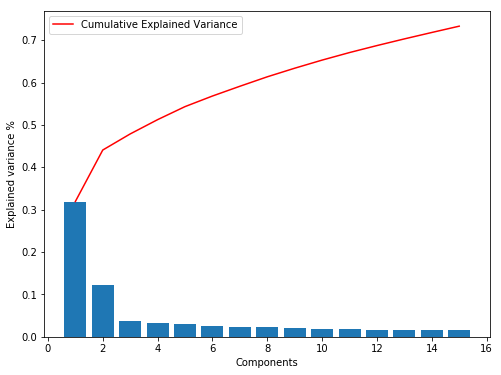

In [685]:
plt.figure(figsize=(8,6))
plt.bar(range(1,len(pca_model.explained_variance_ )+1),pca_model.explained_variance_ratio_ )
plt.ylabel('Explained variance %')
plt.xlabel('Components')
plt.plot(range(1,len(pca_model.explained_variance_ratio_ )+1),
         np.cumsum(pca_model.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

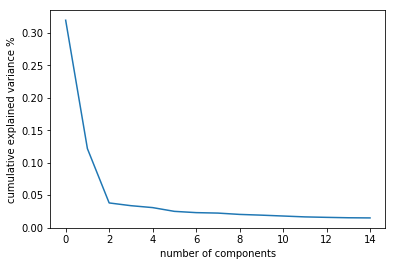

In [686]:
plt.plot(pca_model.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance %')
plt.show()

In [687]:
import plotly.express as px
#projection of the data onto the first 3 PCs, most of the variation is in PC1
fig = px.scatter_3d(principalDf, x='principal component 1', y='principal component 2', z='principal component 3',
                   opacity=0.7)
fig.show()

In [688]:
std_data = pd.DataFrame(standard_data, columns=features)
std_data.head()
len(std_data.columns)

72

Now we can see the weight of each of the features onto each of the principle components. Both visualizations below show this in different ways. The first PC has the most homogeneity because there is some collinarity in the features, and all the PCs after have much more variance in the weights because each of them is orthogonal to one another.

In [689]:
# def myplot(score,coeff,labels=None):
#     xs = score[:,0]
#     ys = score[:,1]
#     n = coeff.shape[0]
#     scalex = 1.0/(xs.max() - xs.min())
#     scaley = 1.0/(ys.max() - ys.min())
#     plt.scatter(xs * scalex,ys * scaley,s=5)
#     for i in range(n):
#         plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
#         if labels is None:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
#         else:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
#     plt.xlabel("PC{}".format(1))
#     plt.ylabel("PC{}".format(2))
#     plt.grid()

# plt.figure(figsize=(12,10))
# myplot(principalComponents[:,0:2],np.transpose(pca_model.components_[0:2, :]),list(std_data.columns))
# plt.show()

15

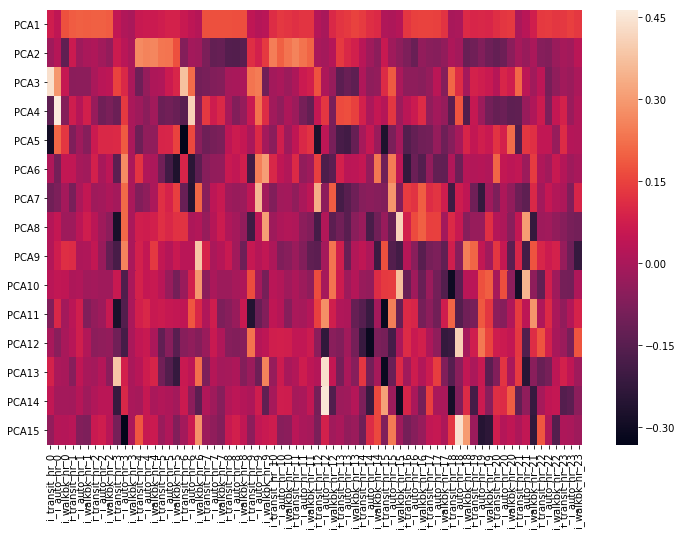

In [690]:
plt.figure(figsize = (12,8))
sns.heatmap(pca_model.components_,
      yticklabels=[ "PCA"+str(x) for x in range(1,pca_model.n_components_+1)],
        xticklabels=list(features) )
pca_model.n_components

#### Interpretation of PCs
PC2 has stronger positive weights on: work transit outbound and inbound, and stronger negative weights on: am school inbound and outbound. There is also a slight positive weights on work auto inbound and active. This might suggest that this is a zip code with a lot of commuters, and not a lot of children/students that were surveyed.

***note*** the fact that this is a survey highly affects the results. When we do a post factor demographic analysis, it will be interesting to see how that lines up with the survey results. We are clustering based on imperfect survey information. 

PC3 has moderate positive weights on am school inbound and outbound, and work transit inbound and outbound. Auto trips are not as heavily weighted here. Active trips are just barely positively weighted. This might suggests that this PC describes zip codes with lower than average car use and maybe better than average transit

PC4 is very uniformly unweighted, except for the non workday shopping feature which is highly positively weighted. This suggests that this PC describes zip codes where there is a lot of retail establishments, where people are making perchases in the evening.

PC5 has strong negative weights on pm home inbound and outbound and the highest positive weight on active mobility trips. there is also a moderately positive weight on work auto inbound trips. this could mean that this zip code is not primarily residential (the lack of inbound home trips and the higher amount of inbound work trips). this also fits with a business district because in more dense locations people might be more likely to walk/bike to destinations close to their office, like to lunch or a quick errand,etc.



# K- means

In [691]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

from sklearn.cluster import DBSCAN

In [692]:
# Keep the top 5 principal components to use in clustering
print(principalComponents.shape)

y = principalComponents[:,0:n_components]
# y = PCs
y

(249, 15)


array([[-0.87477141, -1.02078704, -0.62881872, ..., -0.3323579 ,
         0.26691211, -0.65771013],
       [-6.24959137,  0.06134734, -0.34117613, ...,  0.18995736,
        -0.13402743, -0.58435493],
       [ 6.58021055, -1.354974  , -1.50258595, ..., -1.24912926,
        -1.10427198, -0.7585759 ],
       ...,
       [-0.75995809, -1.2804253 ,  1.43513347, ..., -1.81329285,
         2.20955685,  0.58387204],
       [ 6.47523233, -5.16696692,  1.62308705, ...,  1.42344417,
        -1.69155817, -1.30696809],
       [ 2.96826928, -3.35679189,  0.841504  , ...,  0.20593807,
         1.57528271,  0.13883953]])

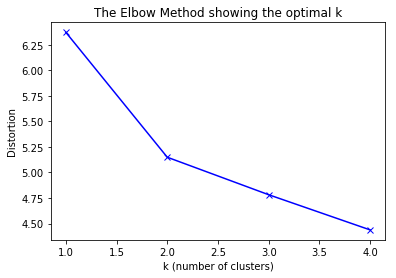

In [693]:
# k means determine k
distortions = []
K = range(1,5)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(y)
    kmeanModel.fit(y)
    distortions.append(sum(np.min(cdist(y, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / y.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 5 The average silhouette_score is : 0.22963191076098366


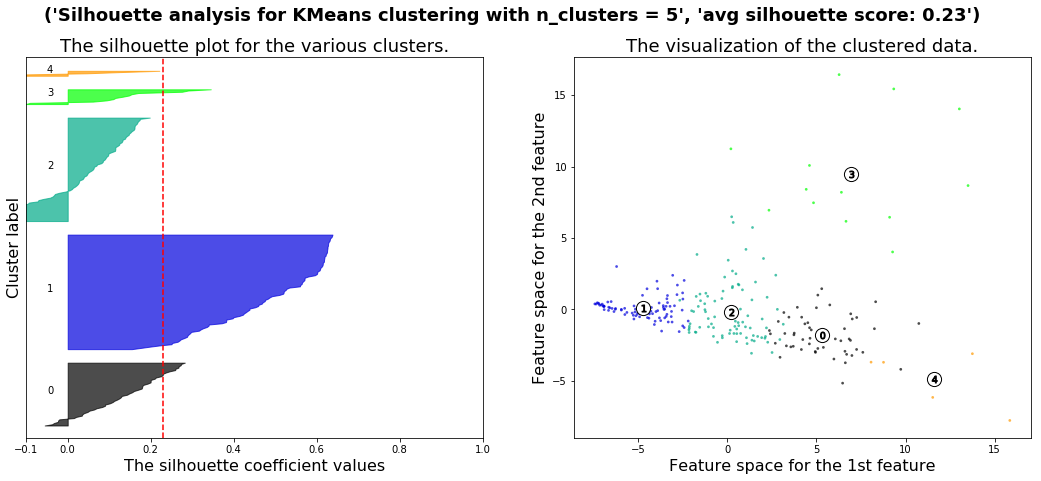

In [694]:
range_n_clusters = [5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(y) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=9)
    cluster_labels = clusterer.fit_predict(y)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(y, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(y, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.", fontsize=18)
    ax1.set_xlabel("The silhouette coefficient values", fontsize=16)
    ax1.set_ylabel("Cluster label", fontsize=16)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(y[:, 0], y[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.", fontsize=18)
    ax2.set_xlabel("Feature space for the 1st feature", fontsize=16)
    ax2.set_ylabel("Feature space for the 2nd feature", fontsize=16)

    plt.suptitle(("Silhouette analysis for KMeans clustering "
                  "with n_clusters = %d" % n_clusters, "avg silhouette score: {:.3}".format(silhouette_avg)),
                 fontsize=18, fontweight='bold')
    #plt.savefig('Graphics/silhouette %d.png' % n_clusters,dpi=600)
plt.show()

In [695]:
import geopandas as gp
labeled_zcode = zcode_data.copy()
labeled_zcode["cluster"] = clusterer.labels_
labeled_zcode["ZIP"] = zcode_data["ZIP"].apply(lambda x: str((int(float(x)))))
# cluster_zip_geo = zcode_data[["ZIP", "cluster"]]
zip_shp = gp.read_file(data_path+"zcode_shapefile/ZCTA2010.shp")
cluster_zip_geo = zip_shp.merge(labeled_zcode, right_on="ZIP", left_on="ZCTA")[["ZIP", "cluster", "geometry"]]
cluster_zip_geo



,ZIP,cluster,geometry
0,94601,2,"POLYGON ((-195843.682 -22645.035, -195822.040 ..."
1,94501,0,"POLYGON ((-201604.187 -25728.139, -202894.954 ..."
2,94560,2,"POLYGON ((-181289.671 -49924.408, -181237.554 ..."
3,94587,2,"POLYGON ((-182052.317 -43764.050, -182037.584 ..."
4,94580,1,"POLYGON ((-187567.889 -34790.577, -187565.018 ..."
5,94514,1,"POLYGON ((-137798.626 -21072.462, -137753.179 ..."
6,94703,2,"POLYGON ((-200453.705 -13919.296, -200454.278 ..."
7,94549,0,"POLYGON ((-183571.069 -8562.765, -183582.111 -..."
8,94595,2,"POLYGON ((-182659.804 -15739.577, -182676.704 ..."
9,94506,1,"POLYGON ((-164197.492 -26359.805, -164209.568 ..."


In [696]:
# cluster_zip_geo.to_file(data_path+"modes_cluster_la.shp")

In [697]:
labeled_zcode[["ZIP", "cluster"]].to_csv("bay_cluster_labels.csv")

In [708]:
hhsize = pd.read_csv(data_path+"ACS_17_5YR_B25010/ACS_17_5YR_B25010_with_ann.csv", header=1)[["Id2", "Estimate; Total:"]]
hhsize["Id2"] = hhsize["Id2"].apply(lambda x: str(x))
labeled_zcode[["ZIP", "cluster"]]
hhsize.dtypes

Id2                 object
Estimate; Total:    object
dtype: object

In [726]:
cluster_0 = labeled_zcode[labeled_zcode["cluster"] == 0]
auto_inb_day = cluster_0[[col for col in cluster_0.columns if "i_auto" in col]].sum(axis=1)
np.mean(auto_inb_day)

271.9423076923077

In [714]:
merged = pd.merge(hhsize, labeled_zcode[["ZIP", "cluster"]], left_on='Id2', right_on="ZIP", how="right")
merged

,Id2,Estimate; Total:,ZIP,cluster
0,94002,2.57,94002,2
1,94005,2.47,94005,1
2,94010,2.64,94010,0
3,94014,3.56,94014,2
4,94015,3.22,94015,2
5,94019,2.78,94019,2
6,94020,2.49,94020,1
7,94022,2.68,94022,0
8,94024,3.00,94024,2
9,94025,2.78,94025,4


In [710]:
len(merged)

249

In [711]:
len(labeled_zcode[["ZIP", "cluster"]])

249